In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Get 2D histogram

In [32]:
def get_sparsity(series):
    total_data = len(series)
    missing_data = series.isnull().sum()
    percent_sparse = (missing_data / total_data) * 100
    return percent_sparse

def get_gaplengths(series):
    gaplengths = (series.isnull().astype(int)
                   .groupby(series.notnull().cumsum()).sum().values)
    return gaplengths[gaplengths > 0] 

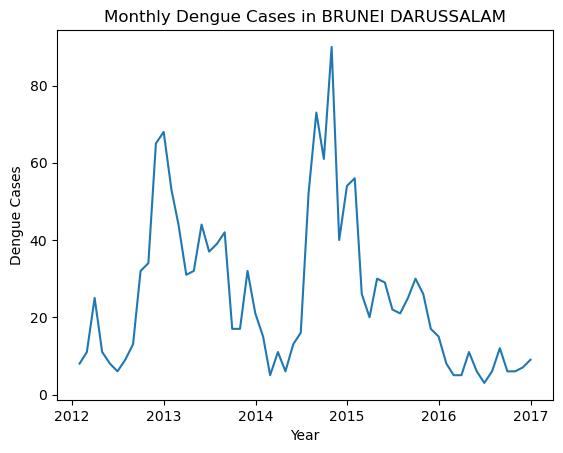

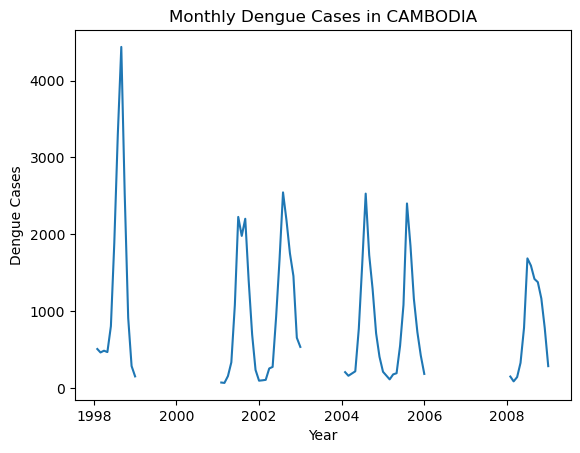

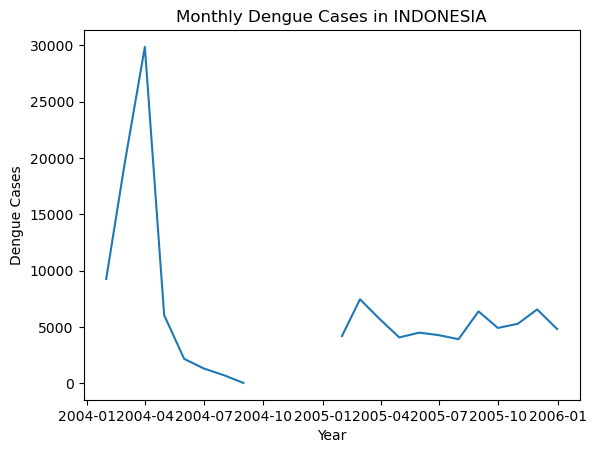

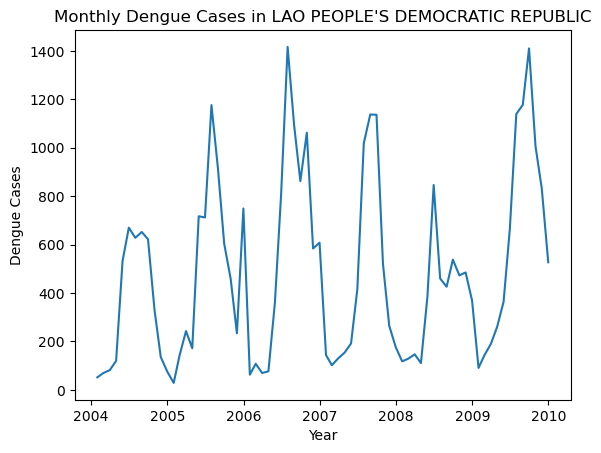

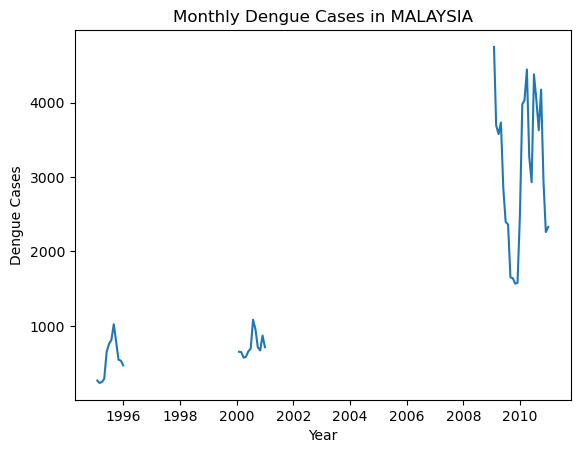

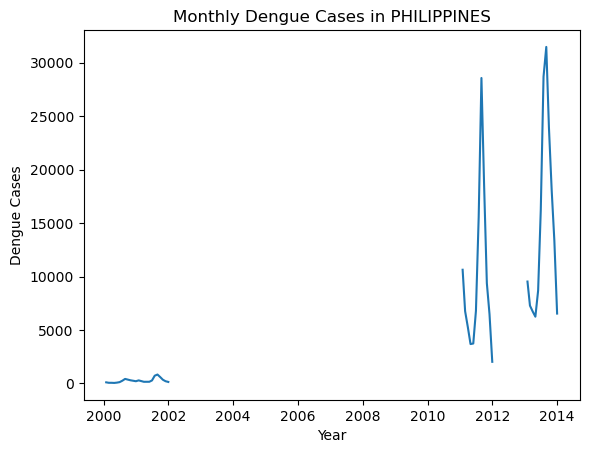

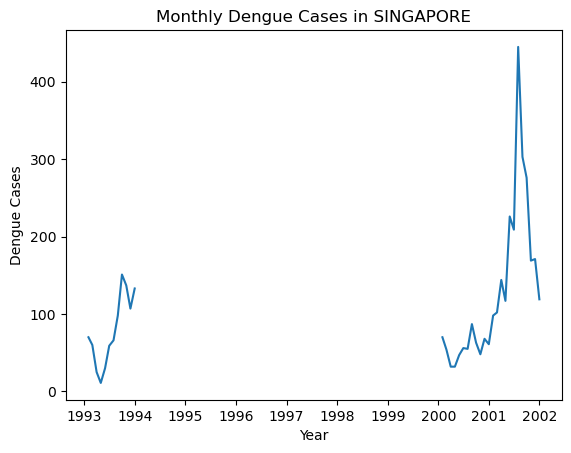

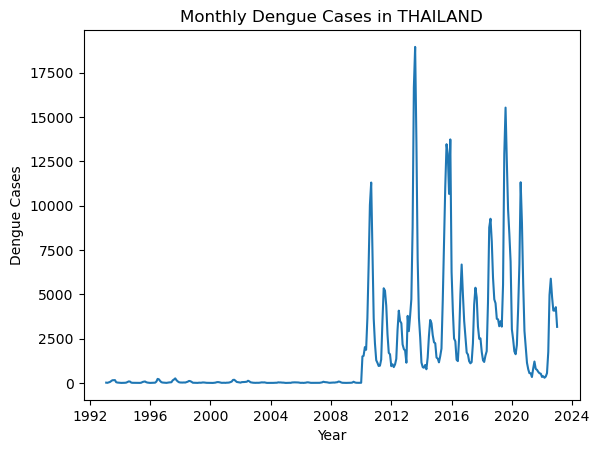

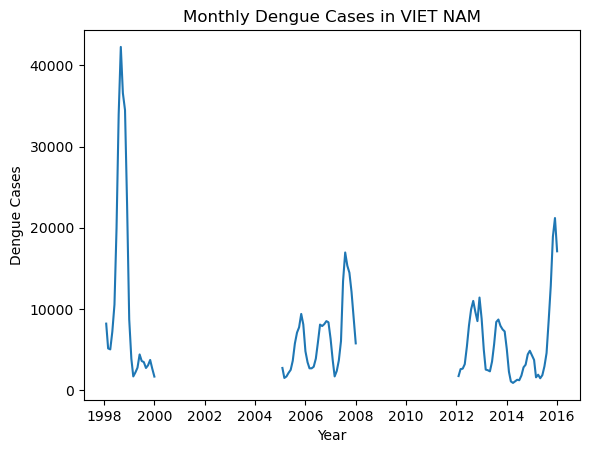

In [35]:
file = '/Users/andrearosefranco/VIP/AY2024-2025/OpenDengueData/SEA.csv'
data = pd.read_csv(file, header=0)
data = data[data['T_res'] == 'Month']

all_sparsity_ratios = []
all_gap_lengths = []

for country, group in data.groupby('adm_0_name'):
    #Get date and dengue case columns
    data_cases = group[['calendar_end_date', 'dengue_total']]
    
    #Convert the date column to datetime and set it as the index
    data_cases['calendar_end_date'] = pd.to_datetime(data_cases['calendar_end_date'])
    data_cases.set_index('calendar_end_date', inplace=True)
    date_range = pd.date_range(start=data_cases.index.min(), end=data_cases.index.max(), freq='M')
    data_cases = data_cases.reindex(date_range)
    
    #Plotting
    plt.plot(data_cases['dengue_total'])
    plt.title(f'Monthly Dengue Cases in {country}')
    plt.ylabel('Dengue Cases')
    plt.xlabel('Year')
    plt.show()
    
    sparsity = get_sparsity(data_cases['dengue_total'])
    gap_lengths = get_gaplengths(data_cases['dengue_total'])

    all_sparsity_ratios.extend([sparsity] * len(gap_lengths)) 
    all_gap_lengths.extend(gap_lengths) 

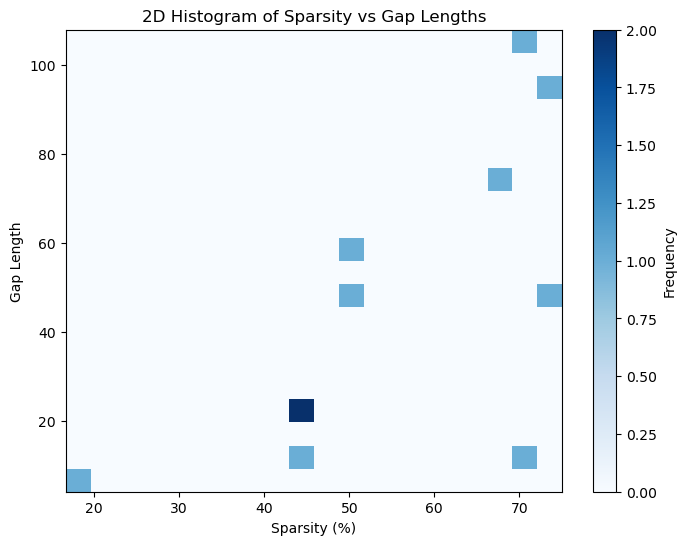

In [39]:
plt.figure(figsize=(8, 6))
plt.hist2d(all_sparsity_ratios, all_gap_lengths, bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Sparsity (%)')
plt.ylabel('Gap Length')
plt.yticks()
plt.title('2D Histogram of Sparsity vs Gap Lengths')
plt.show()